# Кластеризация


В данном ноутбуке мы познакомимся с задачей кластеризации, которая относится к области машинного обучения без учителя. Мы рассмотрим следующие темы:


1.   Алгоритм кластеризации K-средних
2.   Подбор числа кластеров
3.   DBSCAN и подбор параметров для него
4.   Иерархическая кластеризация
5.   Задача понижения размерности
6.   Работа с реальными данными.



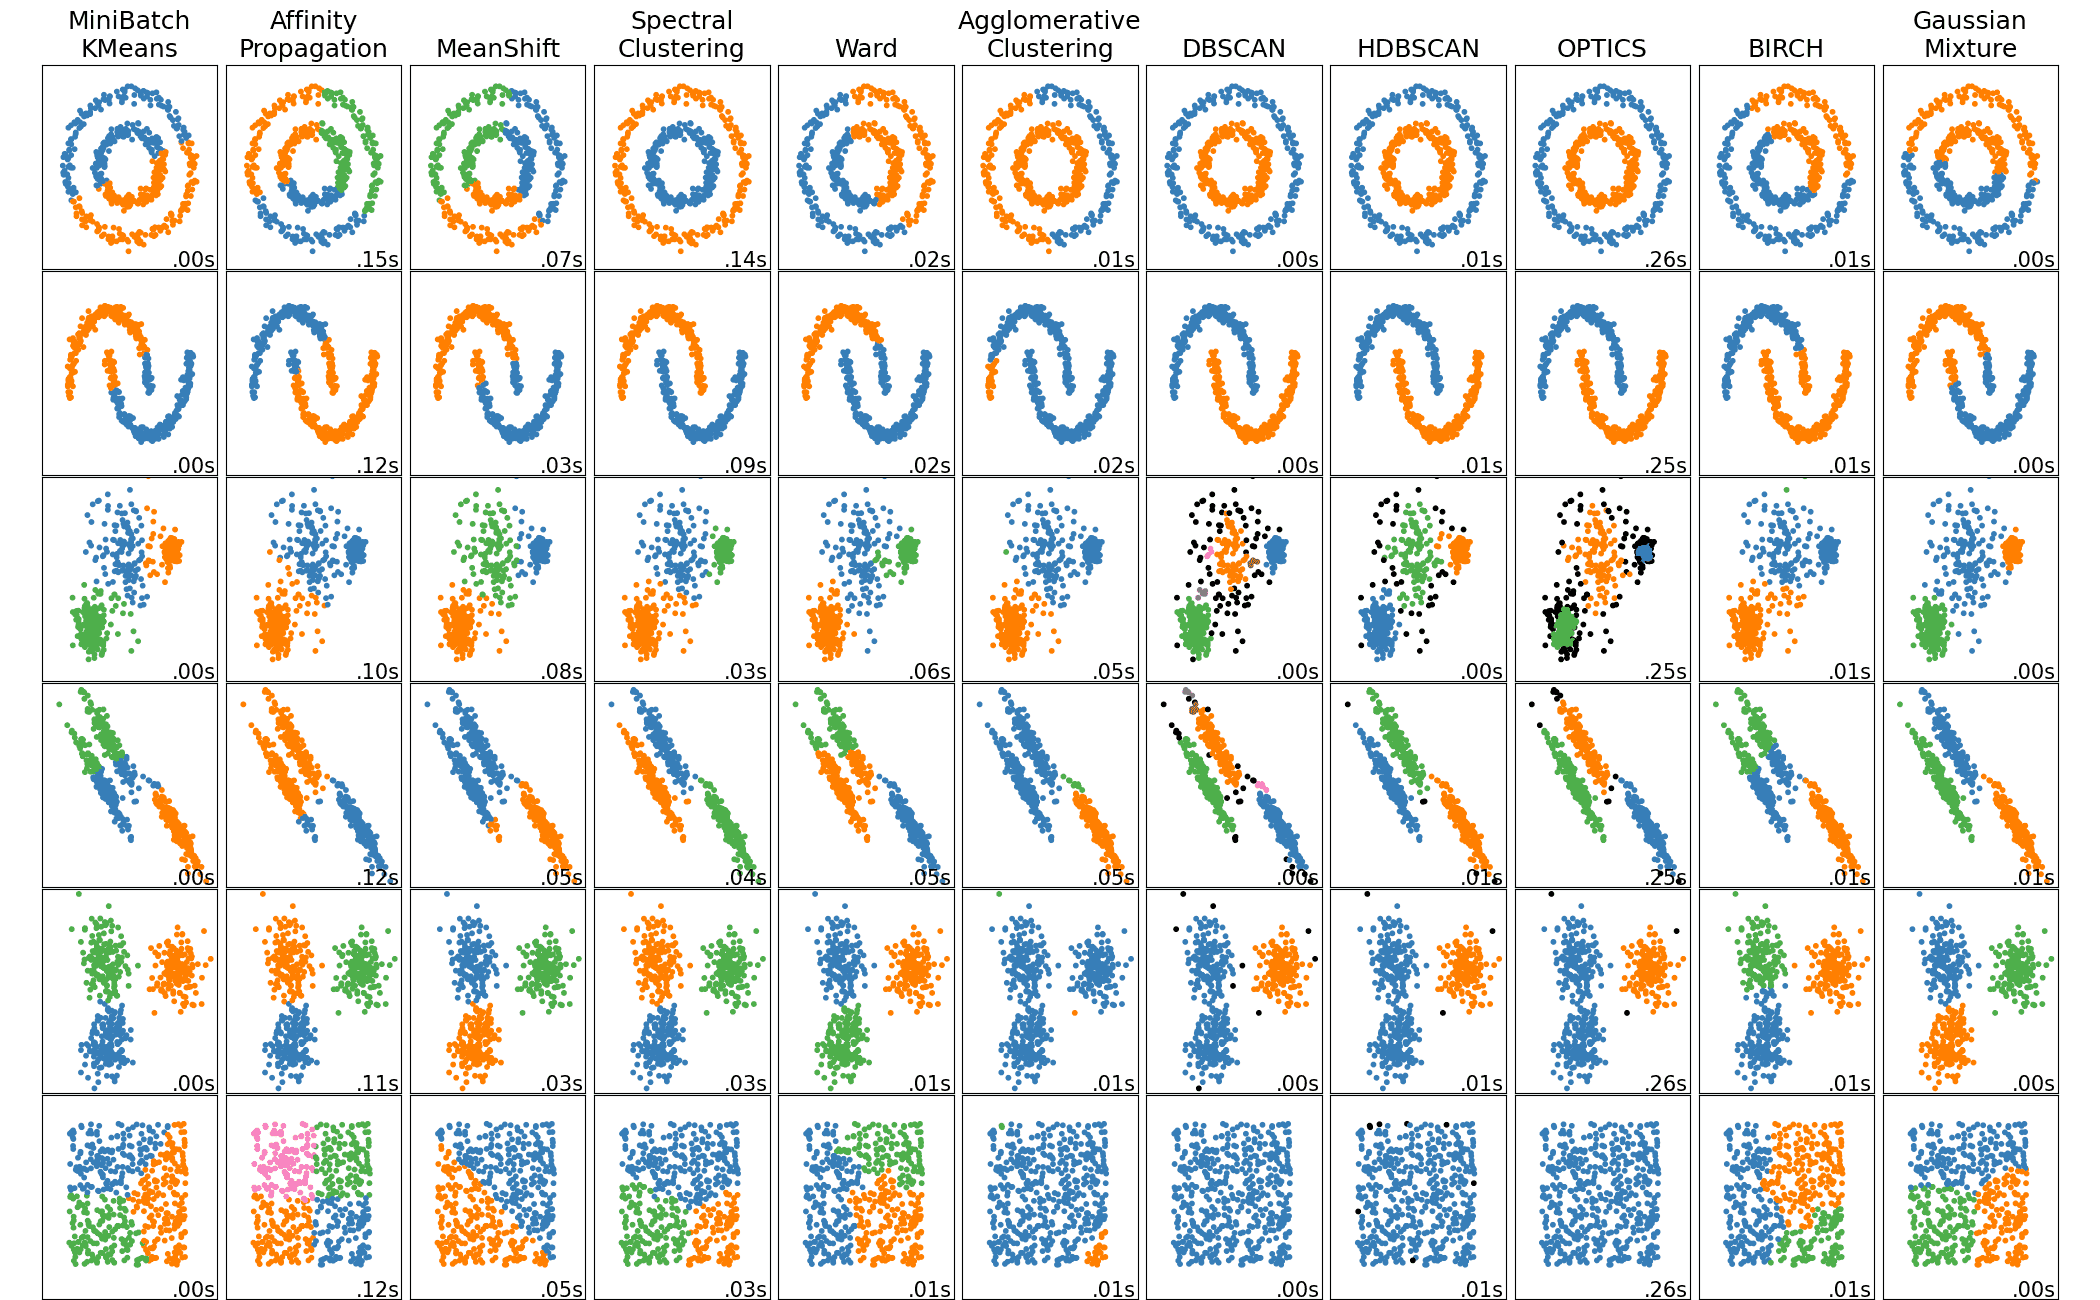

Кластеризация - полезный инструмент в бизнесе. С помощью нее, прежде всего, можно проанализировать большие наборы данных на основе сгруппированных кластеров. Например, разделив данные о пользователях на несколько кластеров, мы сможем понять, какие существуют типы поведения, и адаптировать наш сервис под них.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## K-средних

Алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайно (должно быть задано количество кластеров).
2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
3. Производится пересчет центров кластеров по формуле центра масс всех точек, принадлежащих кластеру.
4. Пункты 2-3 повторяются до тех пор, пока центры кластеров не перестанут меняться (сильно).

$
\begin{aligned}
& J = \sum_{i=1}^{m} \sum_{j=1}^{k} \lVert x_i - c_j \rVert^2 \\
& \text{где:} \\
& J \text{ - функция потерь (сумма квадратов расстояний)}, \\
& m \text{ - количество обучающих примеров}, \\
& k \text{ - количество кластеров}, \\
& x_i \text{ - } i\text{-й пример}, \\
& c_j \text{ - центр } j\text{-го кластера}.
\end{aligned}
$

Сгенерируем три случайных непересекающихся кластера из нормального распределения с центром в разных точках.

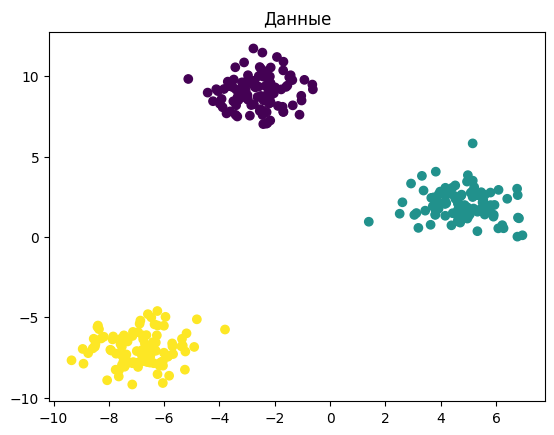

In [2]:
from sklearn.datasets import make_blobs

# Функция для генерации данных, всего 300 точек и 3 центра
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Строим диаграмму рассеивания, каждый класс покрасим в отдельный цвет
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Данные')
plt.show()

Применим K средних с числом кластеров 3.

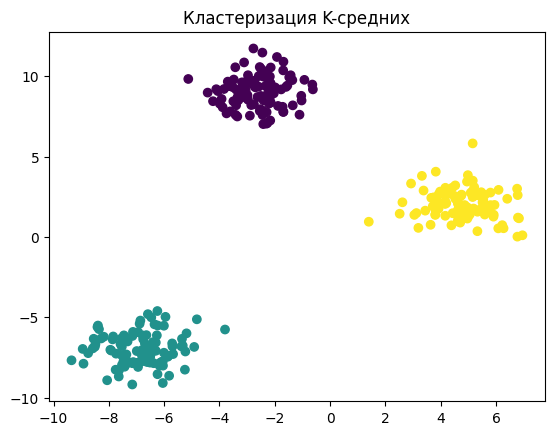

In [9]:
# Импортируем библиотеку, отвечающую за алгоритм K-средних
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42) # n_clusters - число кластеров
k_means = k_means.fit(X) # кластеризуем
clusters = k_means.predict(X) # получаем предсказанные кластеры
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.title('Кластеризация K-средних')
plt.show()

Попробуем перебрать количество кластеров от 2 до 7.

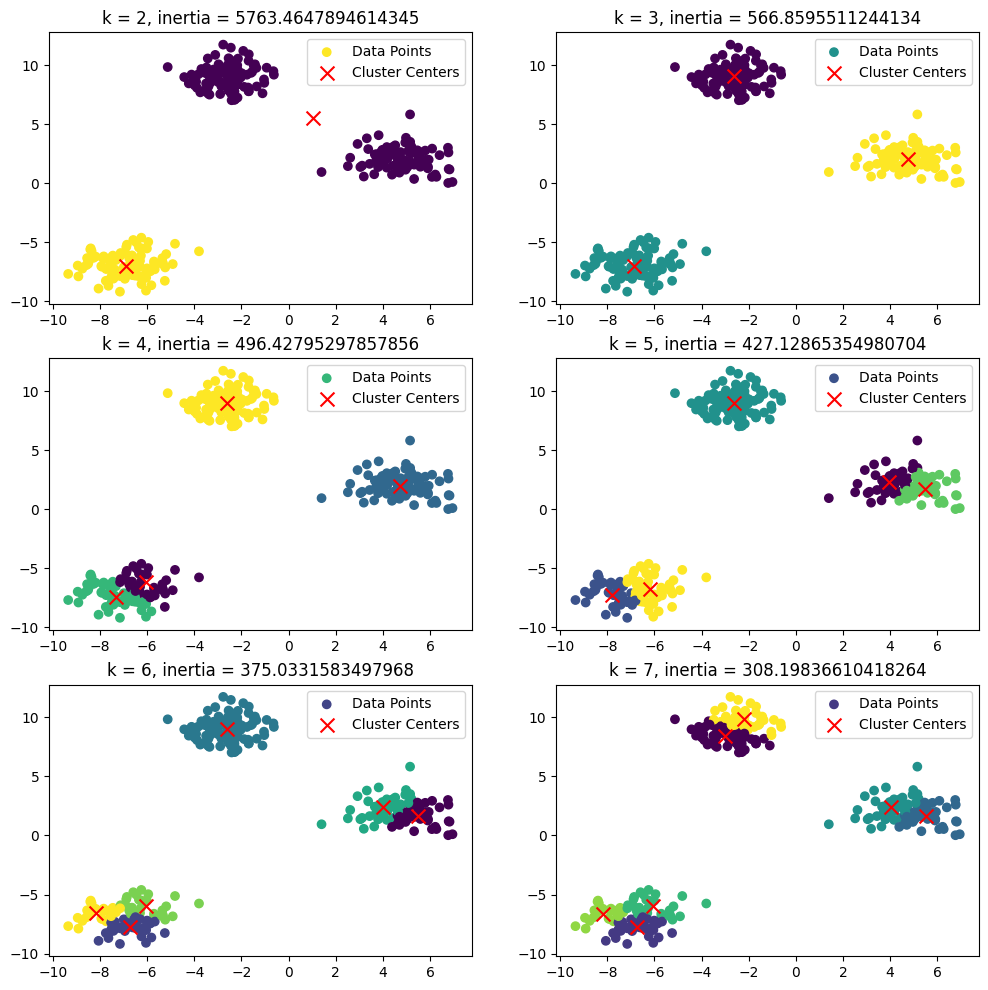

In [4]:
inertia_values = []
k_values = []

plt.figure(figsize=(12, 12))
for k in range(2, 8): # Итерируемся по количеству кластеров

    # Центры классов также называют центроидами
    # Указываем количество запусков KMeans с разными начальными центроидами - 10
    k_means = KMeans(n_clusters=k, n_init=10, random_state=42)

    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    cluster_centers = k_means.cluster_centers_  # Выбираем центр кластера
    plt.subplot(3, 2, k - 1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, label='Data Points')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red',
                marker='x', s=100, label='Cluster Centers')  # рисуем центроиды
    plt.title('k = {}, inertia = {}'.format(k, k_means.inertia_))
    inertia_values.append(k_means.inertia_) # Добавляем значение инерции
    k_values.append(k)
    plt.legend()
plt.show()

Инерция в K-средних - сумма квадратов расстояний внутри кластеров.

In [10]:
k_means.inertia_

566.8595511244134

Формула инерции совпадает с той, которую минимизирует алгоритм K-средних

$\begin{aligned}
& \quad I = \sum_{i=1}^{m} \sum_{j=1}^{k}\lVert x_i - c_j \rVert^2 \\
& \text{где:} \\
& I \text{ - инерция (сумма квадратов расстояний)}, \\
& m \text{ - количество обучающих примеров}, \\
& k \text{ - количество кластеров}, \\
& x_i \text{ - } i\text{-й пример}, \\
& c_j \text{ - центр } j\text{-го кластера}.
\end{aligned}$





Правило локтя для определения количества кластеров:

1. Запускаем K-средних с разными значениями `n_clusters`.
2. Для каждого значения `n_clusters`, вычисляем инерцию.
3. Строим график инерции относительно `n_clusters`.
4. Находим точку на графике, где инерция начинает менять свой характер (обычно похоже на сгиб). В этой точке число кластеров `n_clusters` будет оптимальным.

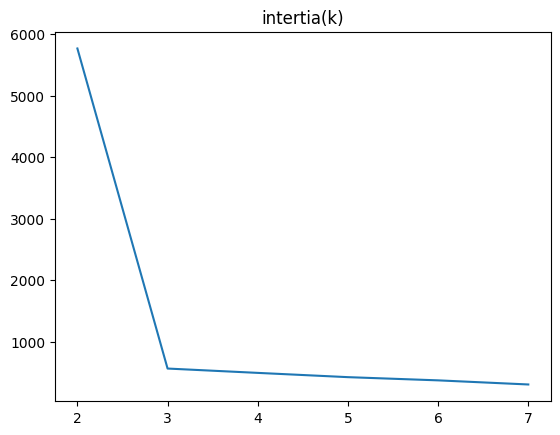

In [11]:
plt.plot(k_values, inertia_values)
plt.title('intertia(k)')
plt.show()

Как мы видим, K-средних обязательно пытается отдать каждому кластеру какие-то объекты и, как большинство алгоритмов кластеризации, зависит от заданного числа кластеров.

Один из главных недостатков K средних является случайная инициализация центров кластеров, что может привести к различным результатам кластеризации.

Главным же достоинством является скорость алгоритма. На каждой итерации требуется пересчет только расстояний до центров кластеров.

 **Для интересующихся**

 [В реализации библиотеки Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) помимо количества кластеров, можно указать и много других параметров.

Основные параметры перечислены ниже:

`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')`

## Вопрос

Какие параметры за что отвечают?

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Чтобы выполнить это задание вам необходимо самостоятельно написать промпт в чате с мистралью.

## **Задание 1**

Сколько кластеров в датасете Iris (переберите от 2 до 9)? Используйте K-средних.

Датасет Iris — включает в себя информацию о 150 образцах ирисовых растений. Каждый образец содержит следующие четыре характеристики:

1. Длина чашелистика (sepal length) в сантиметрах.
2. Ширина чашелистика (sepal width) в сантиметрах.
3. Длина лепестка (petal length) в сантиметрах.
4. Ширина лепестка (petal width) в сантиметрах.

Поскольку данные многомерные, уже нельзя применить визуальный анализ. Количество кластеров мы сможем определить через метод локтя.

In [12]:
from sklearn.datasets import load_iris

# Функция для загрузки датасета с Ирисами
X = load_iris()['data']
X.shape

(150, 4)

In [13]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Чтобы выполнить это задание вам необходимо скопировать промпт без слова "промпт" в чат с мистралью.

**Промпт:**

Напиши код для проверки числа кластеров при помощи метода локтя для датасета цветы ириса и модели K-Means. Датасет уже подгружен, отнормирован и лежит в переменной X. Выведи график.

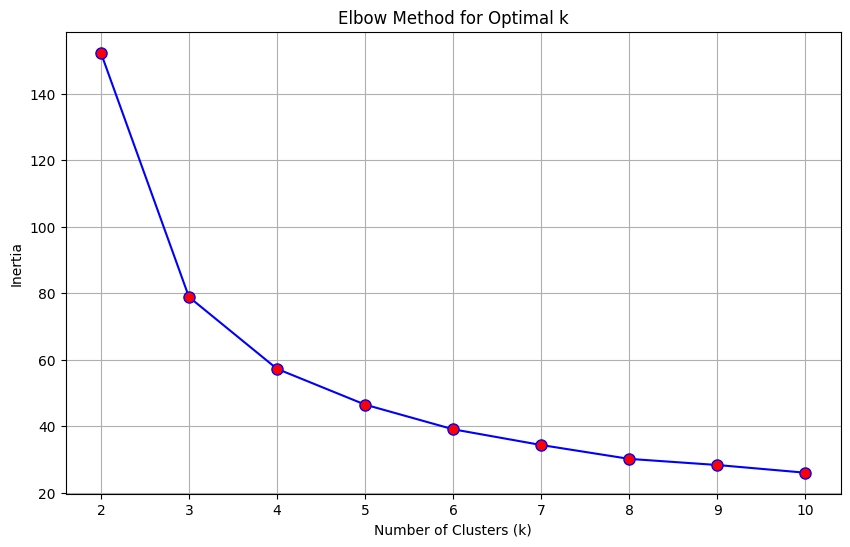

In [16]:
# Ваш код

#import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans

# Предположим, что X уже подгружен и нормализован
# X - это матрица признаков

# Определение диапазона числа кластеров для проверки
k_range = range(2, 11) # С 1 похоже не верно начинать! Нужно с 2

# Список для хранения значений инерции (инерция - это сумма квадратов расстояний от точек до центроидов)
inertia_values = []

# Перебор числа кластеров и обучение модели K-Means
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, 'bo-', markersize=8, markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## Проверяем результаты

Загрузим истинное значение класса для каждого Ириса.

In [17]:
y = load_iris()['target']

In [19]:
k_means = KMeans(n_clusters=3, n_init=10, random_state=42)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

Проверим, все ли кластеры однородные и содержат один класс из y

In [20]:
print(y[clusters==0])
print(y[clusters==1])
print(y[clusters==2])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


Построим heatmap (тепловую карту) соответствия меток класса и кластеров.

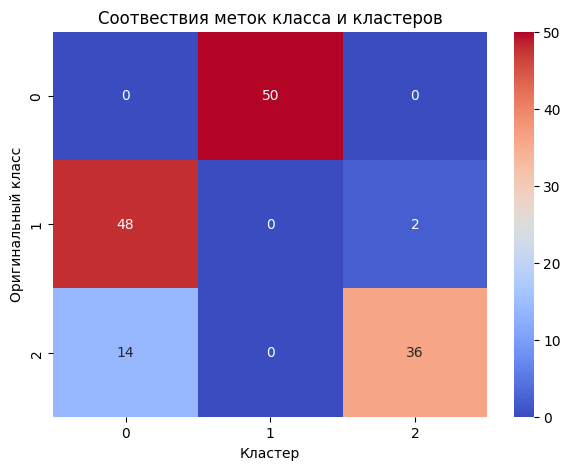

In [21]:
# Импортируем модификацию библиотеки matplotlib
import seaborn as sns
import pandas as pd

# Преобразуем y и предсказания в формат pandas
original_labels_series = pd.Series(y, name='Оригинальный класс')
clusters_series = pd.Series(clusters, name='Кластер')
df = pd.concat([original_labels_series, clusters_series], axis=1)

# Создаем таблицу
cross_tab = pd.crosstab(df['Оригинальный класс'], df['Кластер'])

# Выводим тепловую карту
plt.figure(figsize=(7, 5))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title("Соотвествия меток класса и кластеров")
plt.show()

## DBSCAN

DBSCAN - алгоритм, основанный на плотности. Алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Схему его  работы можно разбить на несколько этапов:

1. Начинаем с выбора случайной точки из данных.

2. Находим все точки в заданном радиусе (`eps`) от выбранной точки. Эти точки называются её соседями.

3. Если у точки достаточное количество соседей (больше минимального числа `min_samples`), то она считается ключевой точкой.

4. Если точка является ключевой, то мы расширяем кластер, добавляя всех её соседей в кластер. Также рекурсивно продолжаем этот процесс для соседей.

5. Повторяем шаги 1-4, пока все точки данных не будут обработаны.

6. В результате точки объединяются в кластеры в зависимости от того, с какими ключевыми точками они связаны.

7. Точки, которые не являются частью кластера и не имеют достаточного числа соседей, считаются шумом.

Посмотрим на результаты кластеризации при разном выборе гиперпараметров `eps` и `min_samples`.

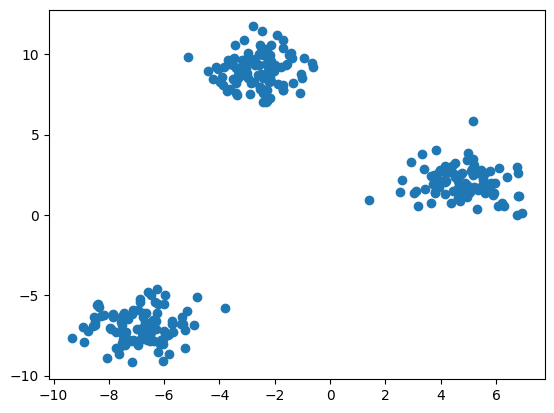

In [22]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
plt.scatter(X[:,0], X[:,1]);

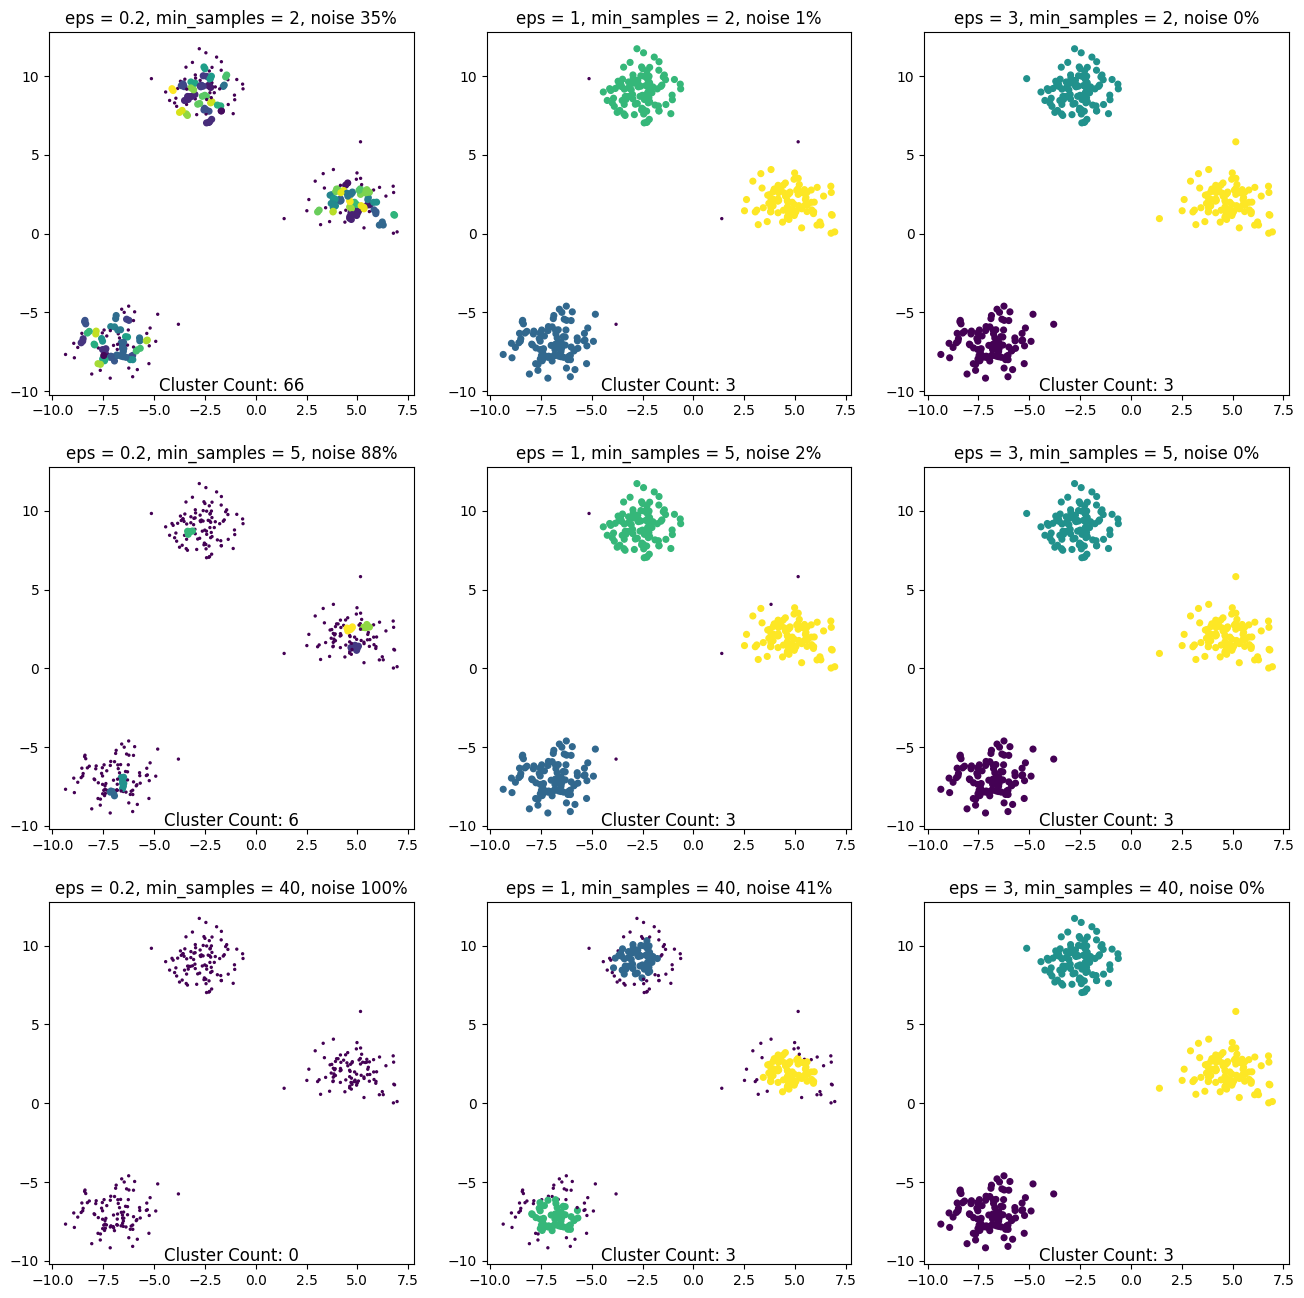

In [23]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(16, 16))
i = 1
for min_samples in [2, 5, 40]: # Итерируемся по парамерту min_samples
    for eps in [0.2, 1, 3]: # Итерируемся по размеру окружности
        dbscan = DBSCAN(eps=eps, min_samples=min_samples) # Создаем сам DBSCAN

        # Обучаем и делаем предсказания через одну строчку
        clusters = dbscan.fit_predict(X)

        # Делаем точки кластеров больше, а точки шума меньше
        plt.subplot(3, 3, i)
        plt.scatter(X[:,0], X[:,1], c=clusters, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, 100. * np.sum(clusters == -1) / len(X))
        )

        # Выводим также количество кластеров на график
        cluster_count = len(np.unique(clusters)) - 1 if -1 in clusters \
        else len(np.unique(clusters))
        plt.text(0.5, 0.01, f'Cluster Count: {cluster_count}',
                 transform=plt.gca().transAxes, fontsize=12, ha='center')
        i += 1
plt.show()

Посмотрим как отработают алгоритмы кластеризации K-средних и DBSCAN при другой форме кластеров.

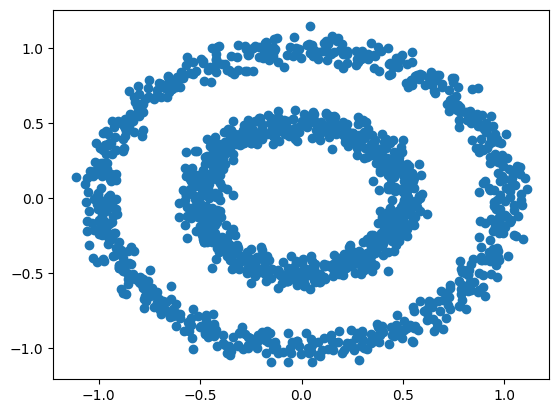

In [24]:
from sklearn.datasets import make_circles
X = make_circles(n_samples=1500, factor=.5, noise=.05, random_state=42)[0]
plt.scatter(X[:,0], X[:,1]);

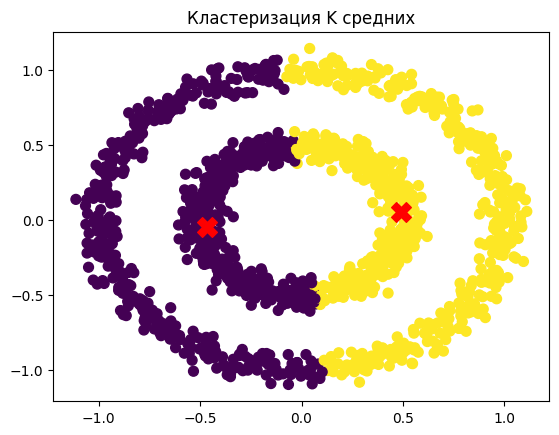

In [25]:
k_means = KMeans(n_clusters=2, n_init=10, random_state=42)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

# Рисуем график с отображением центров кластеров
cluster_centers = k_means.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Кластеризация K средних')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='red', s=200, marker='X')

plt.show()

## **Задание 2**

Подбор параметров DBSCAN для идеальной кластеризации.

Переберите параметры eps, min_samples и визуально определите лучшие значения

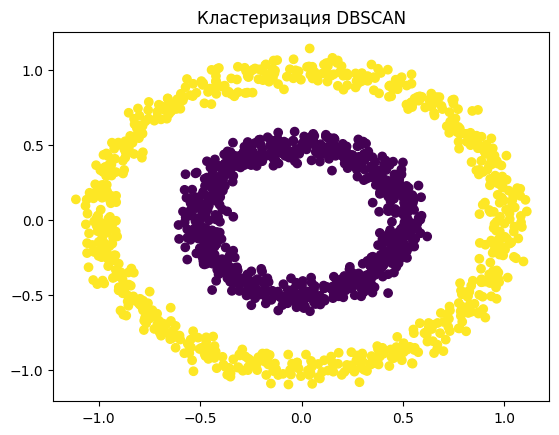

In [40]:
dbscan = DBSCAN(eps=0.11, min_samples=3)  # параметры менять здесь
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = clusters)
plt.title('Кластеризация DBSCAN')
plt.show()

Параметр `eps` можно подобрать и визуально, так как мы можем посмотреть на оси графика и примерно определить расстояние между внешним и внутренним кольцом.

Видно, что DBSCAN хорошо справился с задачей при верном выборе гиперпараметров `eps` и `min_samples`.
K-средних попытался выделить выпуклые области для каждого кластера, и в данном случае не смог выделить кластеры более сложной формы.

Теперь попробуем перебрать 50 значений *eps* в диапазоне 0.01 до 1. А далее построим график, который показывает количество шума и количество классов

In [36]:
# Пример работы np.linspace
np.linspace(0.01, 1.99, 20) # Создает 20 случайных значений в диапазоне

array([0.01      , 0.11421053, 0.21842105, 0.32263158, 0.42684211,
       0.53105263, 0.63526316, 0.73947368, 0.84368421, 0.94789474,
       1.05210526, 1.15631579, 1.26052632, 1.36473684, 1.46894737,
       1.57315789, 1.67736842, 1.78157895, 1.88578947, 1.99      ])

In [42]:
from sklearn.cluster import DBSCAN
import tqdm # Библиотека для отрисовки progress бара

epss = []
noises = []
counts = []
for eps in tqdm.tqdm(np.linspace(0.01, 1, 50)): # Итерируемся по значениям eps
    dbscan = DBSCAN(eps=eps, min_samples=3)

    # Сохраняем рассчитанные значения
    clusters = dbscan.fit_predict(X)
    epss.append(eps)
    counts.append(len(set(clusters)))
    noises.append(100. * np.sum(clusters == -1) / len(X))

100%|██████████| 50/50 [00:01<00:00, 42.30it/s]


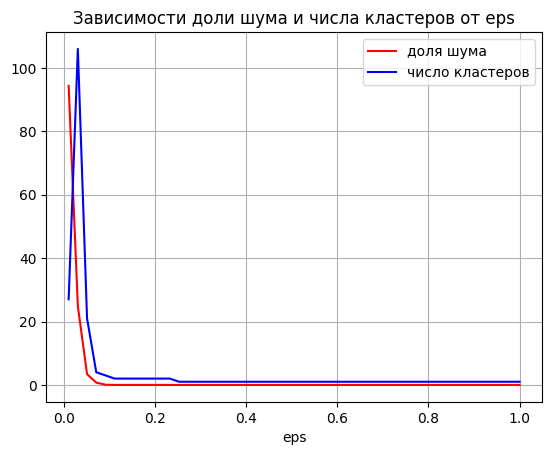

In [43]:
plt.plot(epss, noises, c='red', label='доля шума')
plt.plot(epss, counts, c='blue', label='число кластеров')

plt.title("Зависимости доли шума и числа кластеров от eps")
plt.grid()
plt.xlabel('eps')
plt.legend()
plt.show()

## Бонус: Иерархическая кластеризация

Иерархическая кластеризация позволяет группировать объекты (например, точки данных) в иерархическую структуру или дерево, называемое дендрограммой. Этот метод работает путем последовательного объединения близких объектов в кластеры и создания всё более крупных кластеров на каждом шаге. Иерархическая кластеризация может быть агломеративной (сверху вниз) или дивизивной (снизу вверх).

Она позволяет наглядно представить структуру сходства и различий между объектами, а также выявить кластеры различного уровня детализации, что делает её полезной для анализа данных и выявления паттернов.

Принцип работы можно посмотреть на примере точек в двумерном пространстве. Подпишем их буквами

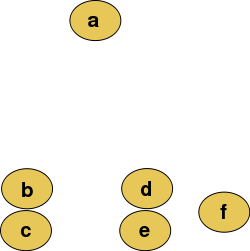

Теперь мы можем применить иерархическую кластеризацию, которая будет постепенно объединять точки.

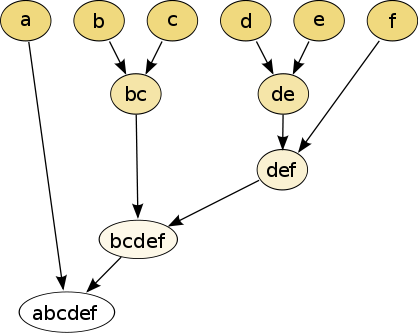

Самые близкие точки по евклидову расстоянию объединились первыми. Далее, зная количество кластеров, мы можем выбрать тот уровень, на котором у нас получается число групп равное числу кластеров.

Посмотрим на то, как она работает на примере сгенерированного набора данных "Луны".

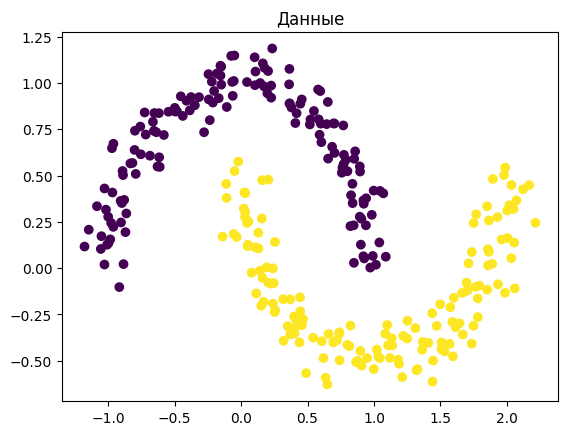

In [44]:
# Импортируем иерархическую кластеризацию
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.08, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Данные')
plt.show()

Справится ли K-средних с данной задачей?

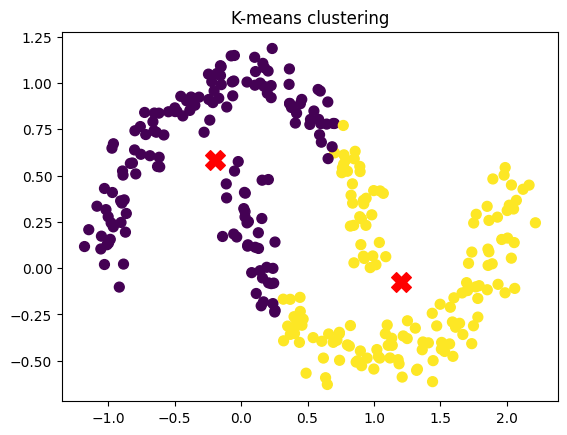

In [45]:
k_means = KMeans(n_clusters=2, n_init=10, random_state=42)
k_means = k_means.fit(X)
clusters = k_means.predict(X)

# Рисуем график с отображением центров класса
cluster_centers = k_means.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-means clustering')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='red', s=200, marker='X')

plt.show()

 Кластеризуем данные при помощи агломеративной кластеризации.


In [46]:
# Передаем два параметра: количество кластеров и linkage
aggl_clust = AgglomerativeClustering(n_clusters=2, linkage="single")

# AgglomerativeClustering при методе fit возвращает нам результат кластеризации
clusters = aggl_clust.fit(X)

Параметр `linkage` определяет, каким образом расстояния между кластерами вычисляются и как выбираются пары кластеров для объединения на каждом этапе.

Посмотрим на результат.

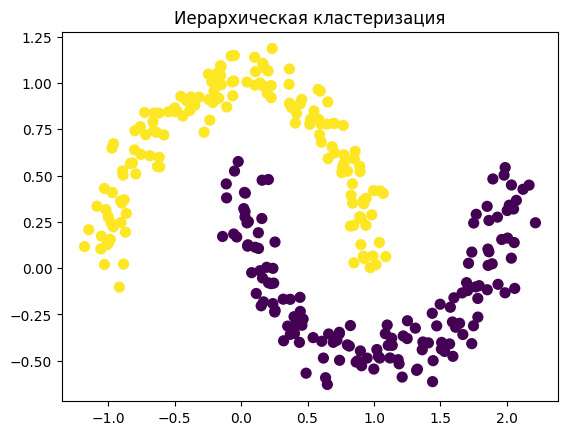

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=clusters.labels_, cmap='viridis', s=50)
plt.title('Иерархическая кластеризация')

plt.show()

Результат сильно зависит от параметра `linkage`. Мы выбрали `single`, он единственный справляется с данными "Луны".


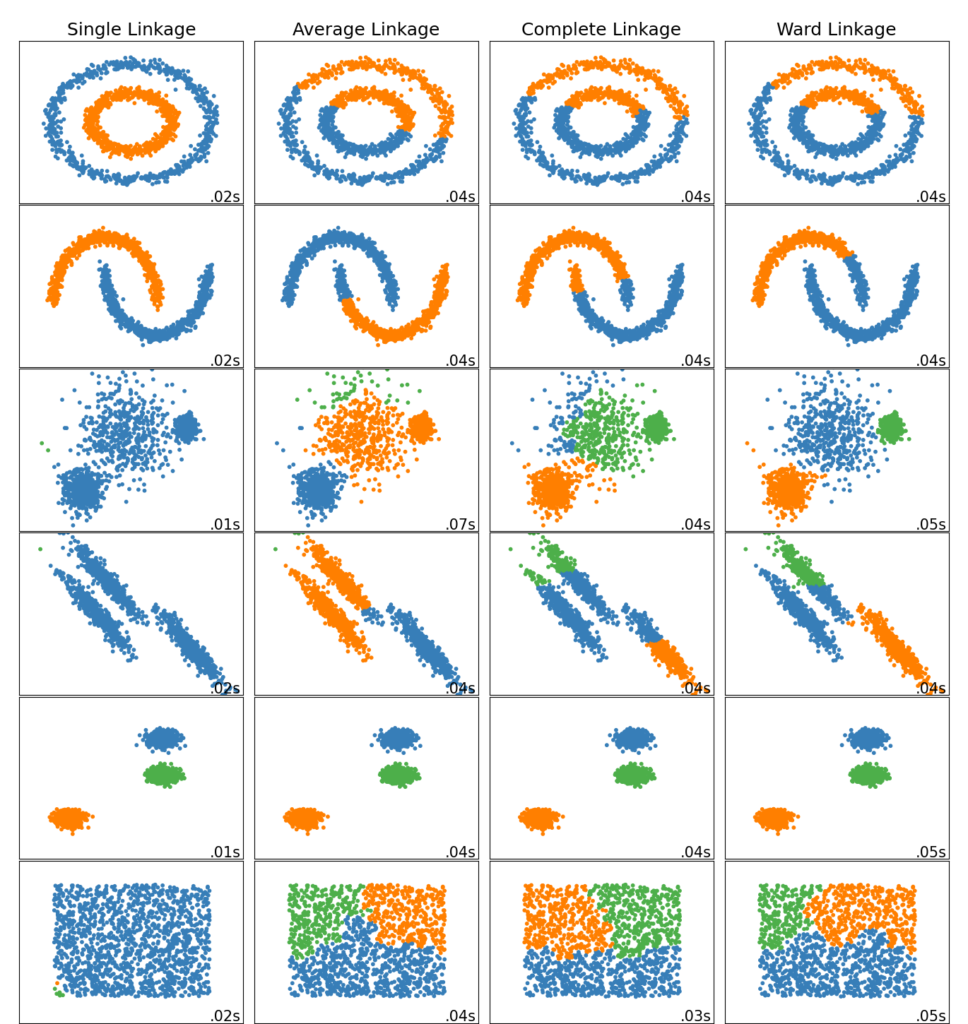

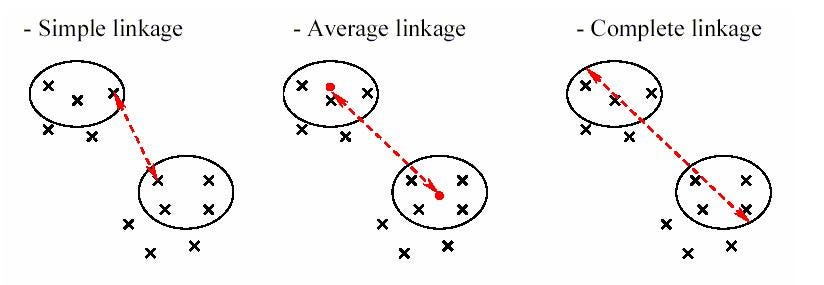

# Данные посложнее - рукописные цифры от 0 до 9.

Рассмотрим образцы рукописного написания цифр

In [48]:
from sklearn.datasets import load_digits
digits = load_digits() # Функция для загрузки набора данных цифр
X, y = digits['data'], digits['target']

Одна цифра - массив из 64 значений, показывающих яркость пикселя в каждой конкретной точке

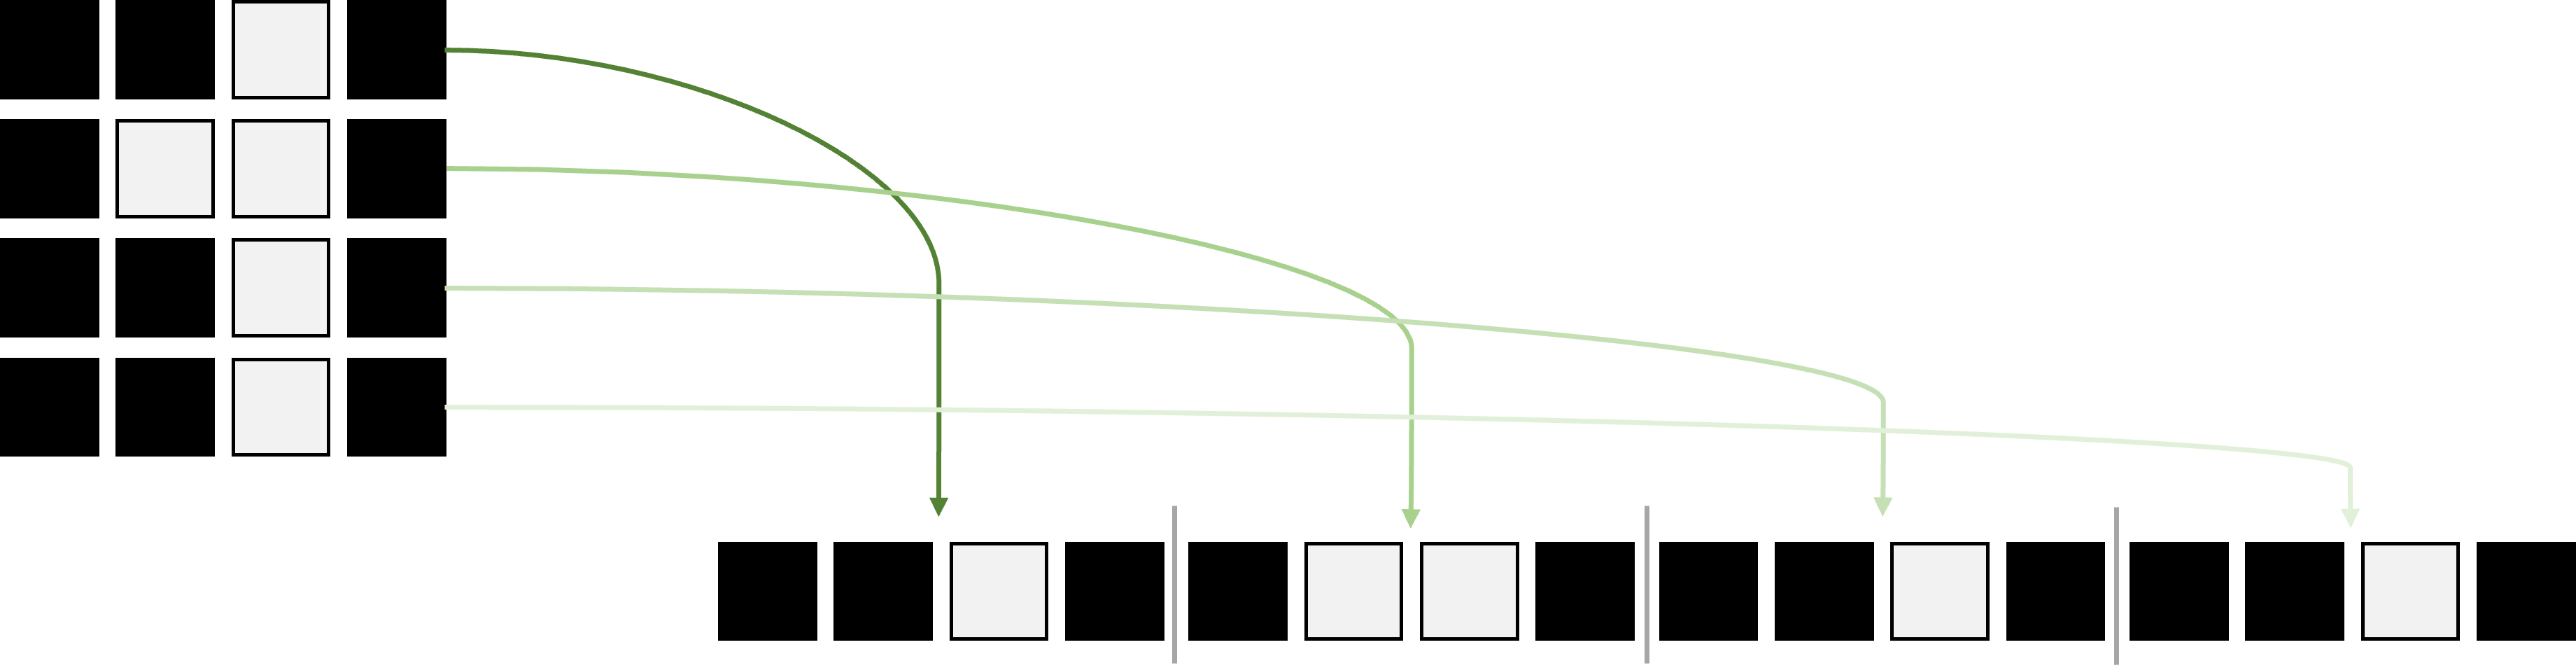

In [49]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


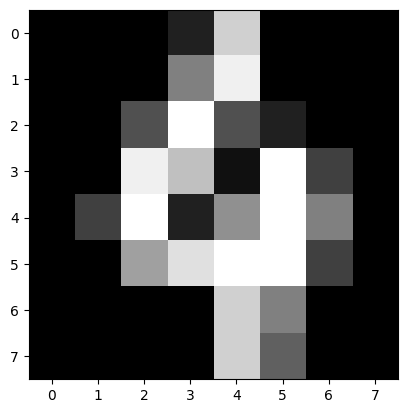

In [50]:
# Посмотрим на изображение цифры
plt.imshow(X[100].reshape(8, 8), cmap='gray');

## **Задание 3**

Кластеризуйте цифры с помощью алгоритма K-средних. Предсказания для каждой из точек нужно записать в переменную clusters, точно также как ранее. После этого попробуйте оценить, получилось ли кластеризовать цифры. Для этого мы уже импортировали `y`, метки классов для изображений.

In [57]:
# Ваш код
k_means = KMeans(n_clusters=10, random_state=42)
k_means = k_means.fit(X)
clusters = k_means.predict(X)


## Измеряем качество кластеризации

Мы знаем настоящую цифру для каждого изображения, поэтому можем проверить качество кластеризации, как долю правильных ответов.

Номера кластеров, которые были предсказаны алгоритмом, не имеют ничего общего с настоящими цифрами.

Посмотрим, какая цифра представлена больше всего в кластере. Будем считать, что это кластер соответствующий этой цифре.

То есть будем считать, что кластер относится к целевому значению $k$, если большинство объектов кластера имеют целевое значение $k$.

In [58]:
pred = np.zeros(X.shape[0])
for i in range(10):
    bc = np.bincount(y[clusters == i])
    pred[clusters == i] = bc.argmax()

In [59]:
y[clusters==0]

array([7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 9,
       7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 7,
       7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 3, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 3, 7, 3, 7, 9,
       7, 7, 8, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7])

Измерим качество.

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred)

0.8614357262103506

Найдем объекты, которые по ошибке попали в этот класс.

In [61]:
incorect_indices = np.where(np.logical_and(pred == 4, y != 4))[0]

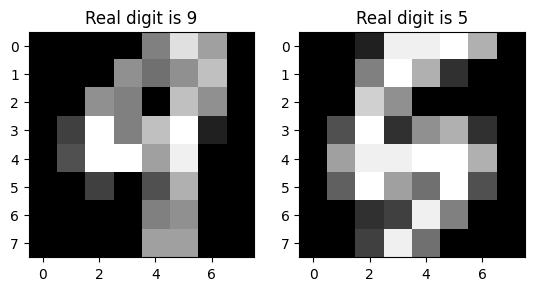

In [62]:
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(X[incorect_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[incorect_indices[i]]))

Посмотрим на настоящие цифры.

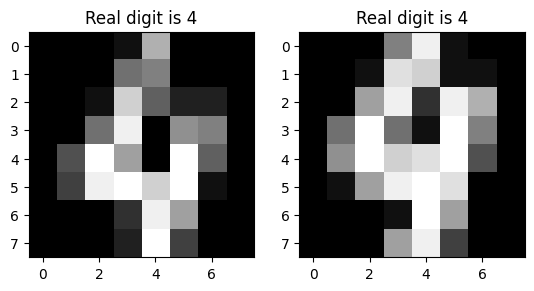

In [63]:
corect_indices = np.where(np.logical_and(pred == 4, y == 4))[0]
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(X[corect_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[corect_indices[i]]))

# Бонус: Алгоритмы понижения размерности

С ростом количества собираемой информации, как правило растет и размерность данных. Для каждого наблюдения добавляются различные признаки. При анализе это сильно усложняет задачу, мы уже не можем увидеть данные во всем объеме на одном графике, так как мы ограничены двумерными графиками (иногда трехмерными). Тем не менее, на данные посмотреть хочется. Как раз для этого мы можем применить алгоритмы понижения размерности, которые позволяет нам отобразить размерность в двумерное пространство и посмотреть на графики.

## PCA

Работа алгоритма состоит из нескольких шагов:

1. **Построение матрицы ковариации X:**
    
   $ \text{Cov(X)} = \frac{1}{n-1}(X-\bar{X})^T(X-\bar{X}) $
2. **Расчет собственных векторов и собственных значений матрицы ковариации:**
   
   $ \text{Cov(X)}v = \lambda v $


3. **Определение доли объясненной дисперсии для каждого из собственных значений:**
   
   $ \text{Доля} = \frac{\lambda_i}{\sum_{j=1}^{p}\lambda_j} $

   Здесь $\lambda_i$ - i-е собственное значение, $p$ - общее количество признаков.

4. **Выбор $k$ собственных векторов, лучше всего объясняющих дисперсию:**

   $ \text{Преобразованные данные} = X \cdot V_k $

5. **Расчет общей сохраненной дисперсии:**
   
   $ \text{Общая сохраненная дисперсия} = \sum_{i=1}^{k}\lambda_i $


In [64]:
from sklearn.datasets import load_digits

digits = load_digits() # Опять загружаем цифры
X, y = digits['data'], digits['target']

Как известно из лекций, PCA позволяет снизить размерность признакового пространства, потеряв наименьшее количество информации.

Применим метод главных компонент к данным про рукописные цифры

Выберем гиперпараметр `n_components=2` и визуализируем результат

In [65]:
%%time
from sklearn.decomposition import PCA

# Задаем класс PCA и указываем там параметр количества главных компонент равный 2
pca = PCA(n_components=2, random_state=42)
digits_2d = pca.fit_transform(X) # Обучаем и трансформируем данные
digits_2d.shape

CPU times: user 4.71 ms, sys: 13 ms, total: 17.7 ms
Wall time: 15.7 ms


(1797, 2)

<Figure size 1300x1000 with 0 Axes>

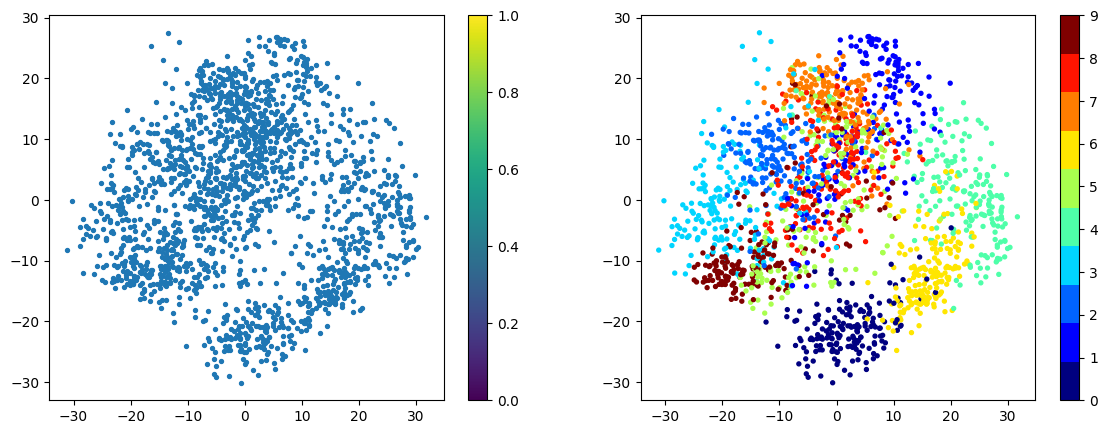

CPU times: user 642 ms, sys: 77.4 ms, total: 719 ms
Wall time: 1 s


In [66]:
%%time
pca = PCA(n_components=2, random_state=42)
digits_2d = pca.fit_transform(X)
digits_2d.shape
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], s=8)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y, cmap=cmap, s=8)
plt.colorbar()
plt.show()

## t-SNE

Основная идея t-SNE заключается в том, чтобы отобразить точки из исходного пространства в пространство меньшей размерности таким образом, чтобы сохранить вероятность соседства точек. Это достигается путем определения условной вероятности того, что пара точек схожа в исходном пространстве и в пространстве меньшей размерности. Затем t-SNE минимизирует дивергенцию Кульбака-Лейблера между этими двумя распределениями, регулируя расстояния между точками в пространстве меньшей размерности.

Ключевой момент заключается в том, что t-SNE уделяет больше внимания сохранению относительных расстояний между близкими точками, что позволяет лучше визуализировать кластеры данных в сравнении с другими методами понижения размерности. Он особенно полезен для обнаружения структуры в данных и выявления внутренних закономерностей.

Алгоритм t-SNE должен гораздо лучше разделять цифры на графике, применим его.

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits['data'], digits['target']

In [68]:
%%time
from sklearn.manifold import TSNE

# Создаем алгоритм t-SNE с двумя главными компонентами и перплексией
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
digits_2d = tsne.fit_transform(X)

CPU times: user 15.8 s, sys: 75.6 ms, total: 15.8 s
Wall time: 15.8 s


Perplexity в t-SNE (t-distributed stochastic neighbor embedding) - это гиперпараметр, который влияет на то, как алгоритм размещает точки данных в низкоразмерном пространстве. Он регулирует баланс между сохранением локальной структуры данных (низкая perplexity) и улавливанием глобальных паттернов (высокая perplexity). Выбор правильного значения perplexity может значительно повлиять на результаты t-SNE визуализации данных.

<Figure size 1300x1000 with 0 Axes>

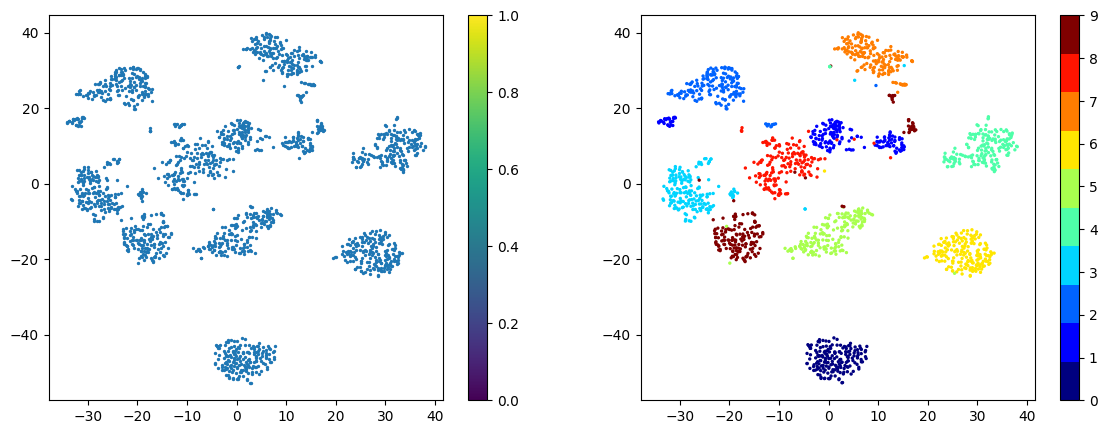

In [69]:
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], s=2)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y, cmap=cmap, s=2)
plt.colorbar()
plt.show()

## Бонус: 3D визуализация 3-х компонент

In [70]:
%%time
import plotly.express as px

tsne = TSNE(n_components=3, perplexity=50)
X, y = digits['data'], digits['target']
digits_3d = tsne.fit_transform(X)

# Создаем график
fig = px.scatter_3d(
    digits_3d, x=0, y=1, z=2, color=y,
    labels={'0': 'Component 1', '1': 'Component 2', '2': 'Component 3'},
)

# Создаем график
fig.update_layout(
    scene=dict(
        xaxis=dict(showbackground=True, gridcolor="white"),
        yaxis=dict(showbackground=True, gridcolor="white"),
        zaxis=dict(showbackground=True, gridcolor="white"),
    )
)

fig.show()


CPU times: user 46.1 s, sys: 279 ms, total: 46.4 s
Wall time: 47.1 s


## **Задание 4**

Определите визуально, сколько кластеров в данных

Попробуйте PCA и t-SNE.


In [71]:
import pandas as pd
# скачиваем данные
# http://cs.joensuu.fi/sipu/datasets/dim032.txt
! wget https://www.dropbox.com/s/n4vwlwe395rrwwe/dim032.txt?dl=1 -O dim032.txt
X = pd.read_csv("dim032.txt", sep='   ', header=None).values.reshape(-1, 32)
X.shape

--2025-01-22 09:38:10--  https://www.dropbox.com/s/n4vwlwe395rrwwe/dim032.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/8h6r1xjwmm7rut99q7lpq/dim032.txt?rlkey=oor4qrtvt4dt2xpq8man8bkm7&dl=1 [following]
--2025-01-22 09:38:10--  https://www.dropbox.com/scl/fi/8h6r1xjwmm7rut99q7lpq/dim032.txt?rlkey=oor4qrtvt4dt2xpq8man8bkm7&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2479e52345e0a5a362d14e85bb.dl.dropboxusercontent.com/cd/0/inline/CiojfpS6U1rpNwpD6dsY8CVzVyXS-Z2Lcj_0HH0wpPNtqw4pVYGAUnj2_Kz99QDMIShpljUICPhl0UPriyuCMffwhW9BpBX4mpczOEcsrxG0NErdXR1loQjfFF0WHJ35ouU/file?dl=1# [following]
--2025-01-22 09:38:11--  https://uc2479e52345e0a5a362d14e85bb.dl.dropboxusercontent.com/cd/0/inline/CiojfpS6

<ipython-input-71-97b82c5ffb3c>:5: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



(1024, 32)

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Промпт для модели нужно придумать самим.

<Figure size 1300x1000 with 0 Axes>

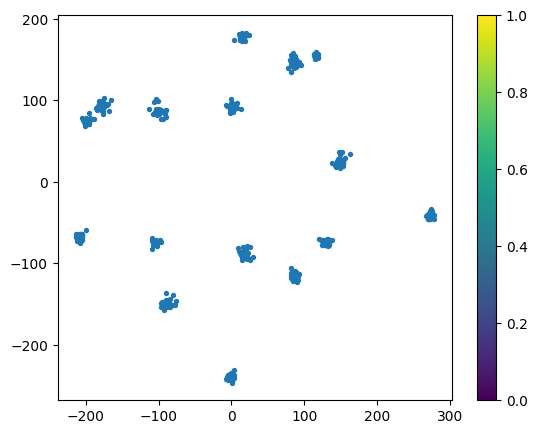

In [73]:
# Ваш код

# Задаем класс PCA и указываем там параметр количества главных компонент равный 2
pca = PCA(n_components=2, random_state=42)
digits_2d = pca.fit_transform(X)
digits_2d.shape
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], s=8)
plt.colorbar()
#plt.subplot(1, 2, 2)
#plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y, cmap=cmap, s=8)
#plt.colorbar()
plt.show()


<Figure size 1300x1000 with 0 Axes>

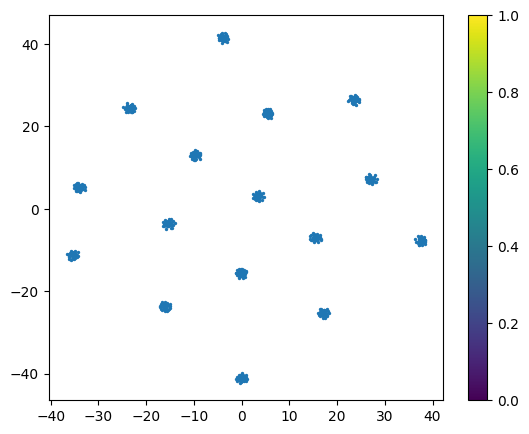

In [75]:
from sklearn.manifold import TSNE

# Создаем алгоритм t-SNE с двумя главными компонентами и перплексией
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
digits_2d = tsne.fit_transform(X)

plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], s=2)
plt.colorbar()
#plt.subplot(1, 2, 2)
#plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y, cmap=cmap, s=2)
#plt.colorbar()
plt.show()

# Кластеризация для реальной задачи

Кластеризация кредитных карт - это задача группировки владельцев кредитных карт на основе их покупательских привычек, кредитных лимитов и многих других финансовых факторов. Мы попробуем подробнее разобраться, как применить уже изученные подходы в задаче кластерного анализа. Такой кластерный анализ помогает компаниям находить своих потенциальных клиентов и разрабатывать многие другие маркетинговые стратегии.

Скачаем данные и извлечем их из формата .zip.

In [76]:
!gdown https://statso.io/wp-content/uploads/2022/11/Credit-card-data.zip

Downloading...
From: https://statso.io/wp-content/uploads/2022/11/Credit-card-data.zip
To: /content/Credit-card-data.zip
100% 341k/341k [00:00<00:00, 6.55MB/s]


In [77]:
!unzip /content/Credit-card-data.zip

Archive:  /content/Credit-card-data.zip
   creating: Credit card data/
  inflating: Credit card data/CC GENERAL.csv  
  inflating: __MACOSX/Credit card data/._CC GENERAL.csv  


In [78]:
import pandas as pd
import numpy as np
from sklearn import cluster

# подгружаем данные с помощью библиотеки pandas
data = pd.read_csv("/content/Credit card data/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Давайте проверим, содержит ли этот набор данных какие-либо пропущенные значения или нет.

In [79]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


В столбце минимальных платежей в наборе данных есть несколько нулевых значений. Давайте удалим эти строки.

In [80]:
data = data.dropna()

В наборе данных есть три признака, которые очень ценны для задачи сегментации кредитных карт:

**BALANCE**: остаток средств на счетах клиентов кредитных карт.

**PURCHASES**: количество покупок, совершенных со счетов клиентов кредитных карт.

**CREDIT_LIMIT**: лимит кредитной карты.


*Этих трех признаков достаточно, чтобы сгруппировать владельцев кредитных карт, поскольку они сообщают нам историю покупок, банковский баланс и кредитный лимит владельцев кредитных карт.*

In [81]:
# импортируем библиотеку для нормализации данных
from sklearn.preprocessing import MinMaxScaler

clustering_data = data[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

scaler = MinMaxScaler()
clustering_data = scaler.fit_transform(clustering_data)

In [82]:
from sklearn.cluster import KMeans

# инициализируем метод кластеризации
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data)
data["CREDIT_CARD_SEGMENTS"] = clusters

Добавили новый столбец как CREDIT_CARD_SEGMENTS. Он содержит метки о группе клиентов кредитных карт, количество сформированных групп варьируется от 0 до 4. Для простоты изменим названия этих кластеров.

In [83]:
data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1:
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})
print(data["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 2
1     Cluster 4
2     Cluster 4
4     Cluster 2
5     Cluster 2
6     Cluster 5
7     Cluster 2
8     Cluster 1
9     Cluster 5
10    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


In [84]:
# импортируем библиотеку для визуализации
import plotly.graph_objects as go

PLOT = go.Figure()
for i in list(data["CREDIT_CARD_SEGMENTS"].unique()):


    PLOT.add_trace(go.Scatter3d(x = data[data["CREDIT_CARD_SEGMENTS"]== i]['BALANCE'],
                                y = data[data["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = data[data["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

Посмотрим еще раз детальнее на данные.

In [85]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_CARD_SEGMENTS
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cluster 4
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,Cluster 4
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 2
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,Cluster 2


## **Задание 5**

в  этом задании необходимо провести аналитику получившихся кластеров. Вам следует сгруппировать данные по кластеру (столбец `CREDIT_CARD_SEGMENTS`), затем рассчитать средние показатели по столбцам `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`.

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**


1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Промпт для модели нужно придумать самим.

In [86]:
clust_analysis = data.groupby("CREDIT_CARD_SEGMENTS")[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]].mean() # Ваш код здесь
clust_analysis

,BALANCE,PURCHASES,CREDIT_LIMIT
CREDIT_CARD_SEGMENTS,,,
Cluster 1,743.219268,1455.807291,6350.484214
Cluster 2,807.233920,556.123230,2084.353838
Cluster 3,8297.183688,2486.380386,12512.339332
Cluster 4,4201.290971,1056.151302,6717.374270
Cluster 5,1223.677524,3371.339735,12703.539823


Давайте построим график изменения среднего баланса кредитных карт, среднего значения покупок и среднего лимита пользователей в зависимости от кластера, в который их отнесли.

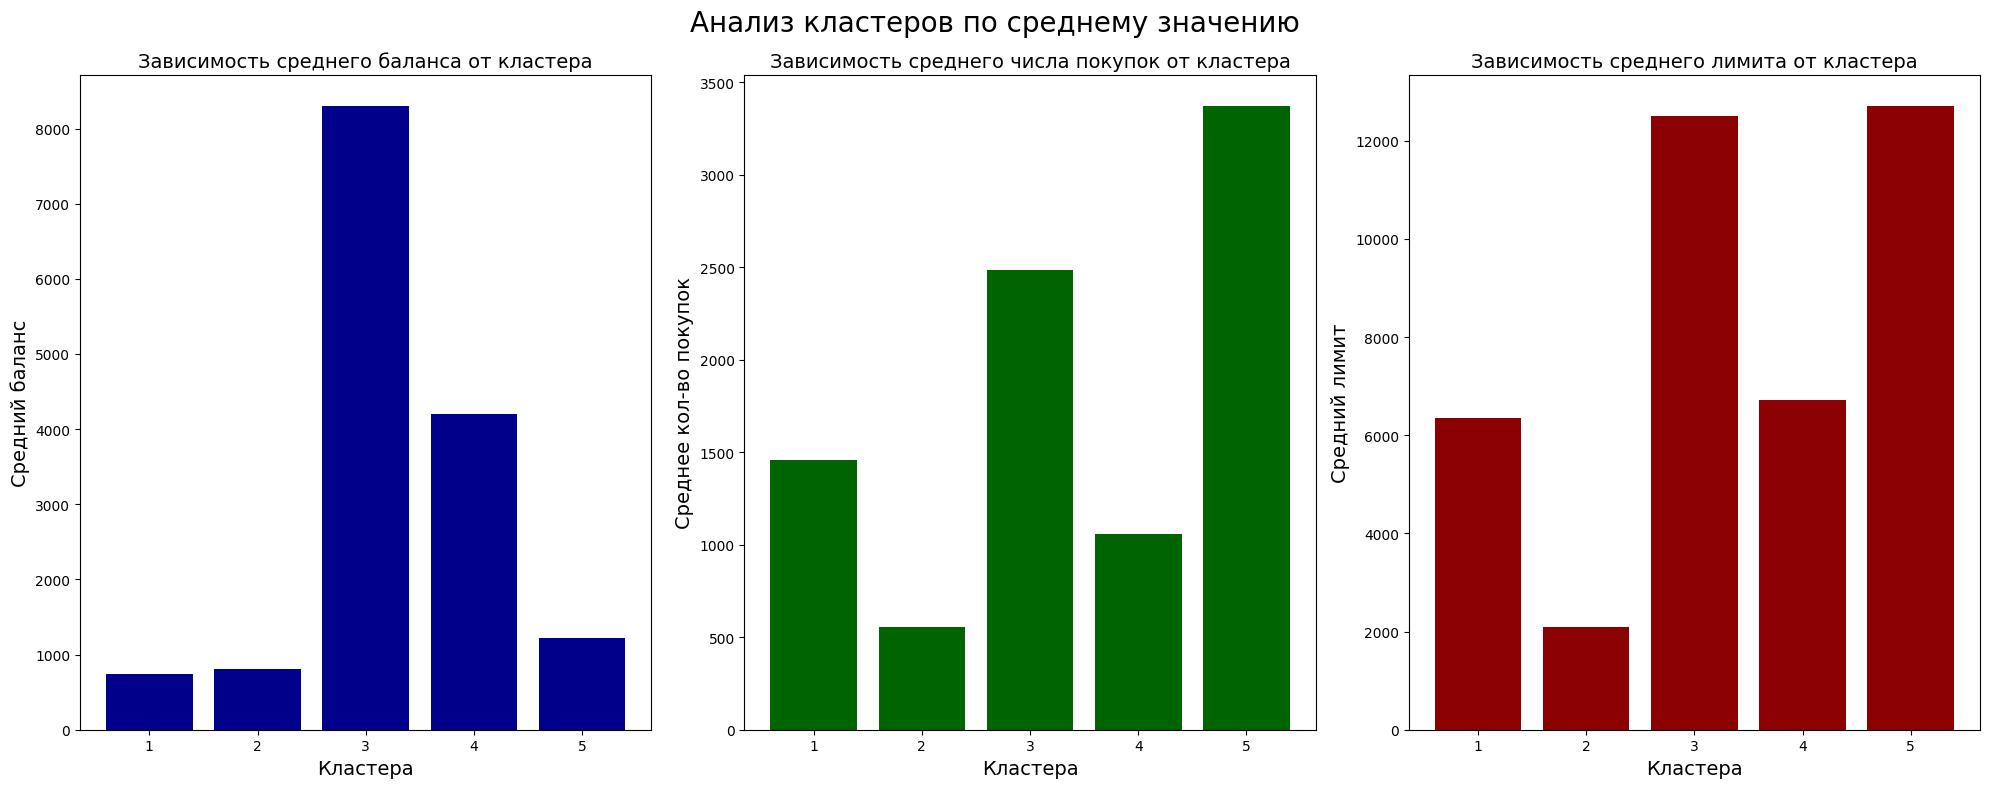

In [87]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# строим график для среднего баланса
ax[0].bar(list(range(1, len(clust_analysis['BALANCE']) + 1)), clust_analysis['BALANCE'], color='darkblue')
ax[0].set_xlabel('Кластера', fontsize=14)
ax[0].set_ylabel('Средний баланс', fontsize=14)

# строим график для среднего числа покупок
ax[1].bar(list(range(1, len(clust_analysis['PURCHASES'])+ 1)), clust_analysis['PURCHASES'], color='darkgreen')
ax[1].set_xlabel('Кластера', fontsize=14)
ax[1].set_ylabel('Среднее кол-во покупок', fontsize=14)

# строим график для среднего лимита
ax[2].bar(list(range(1, len(clust_analysis['CREDIT_LIMIT'])+ 1)), clust_analysis['CREDIT_LIMIT'], color='darkred')
ax[2].set_xlabel('Кластера', fontsize=14)
ax[2].set_ylabel('Средний лимит', fontsize=14)

# построим три графика, расположенных по горизонтали
ax[0].set_title('Зависимость среднего баланса от кластера', fontsize=14)
ax[1].set_title('Зависимость среднего числа покупок от кластера', fontsize=14)
ax[2].set_title('Зависимость среднего лимита от кластера', fontsize=14)

fig.suptitle('Анализ кластеров по среднему значению', fontsize=20)
plt.tight_layout()

plt.show()

Какую зависимость можно выявить? Например, если рассматривать кластеры 3 и 5, у них почти одинаковый лимит по кредитной карте, количество покупок различается на 1000 единиц, но вот количество денег на кредитной карте у пользователей 3-го кластера почти в 8 раз превышает баланс пользователей из 5-ого кластера. Можно предположить, что пользователи 3-й группы совершают либо дорогие покупки, либо много маленьких, например, если человек - шопоголик. Тогда наше решение -  давайте порекомендуем этим пользователям кредитную карту с большим лимитом на покупки.

# Итоги

- Сегодня мы познакомились с задачей кластеризации.
- Посмотрели на основные модели кластеризации и выявили преимущества и недостатки каждой.
- Рассмотрели подходы для иерархической кластеризации.
- Посмотрели на основные методы понижения размерности.
- Провели исследование работы метода KMeans на реальной задаче - кластеризация кредитный карт.